In [7]:
import torch
import torchvision
from torchvision import datasets, transforms, models

In [8]:
# Use eval to enable prediction mode for the model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()

Image shape: (429, 500)


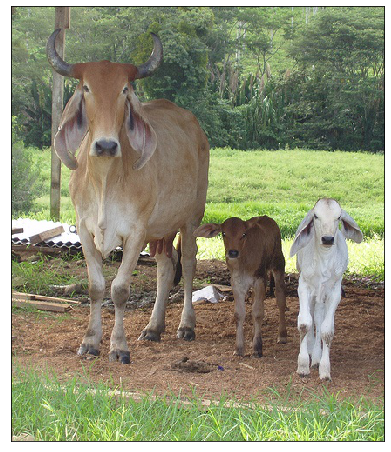

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

filename = '../torch/VOCdevkit/VOC2012/JPEGImages/2007_001299.jpg'
image = Image.open(filename)

print("Image shape:", (image.width, image.height))

plt.figure(figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.imshow(image)
plt.show()

In [20]:
transform_pipeline = transforms.Compose([      
    transforms.ToTensor()
])

transformed_image = torch.unsqueeze(transform_pipeline(image), 0)
print("Transformed image shape:", transformed_image.shape)

Transformed image shape: torch.Size([1, 3, 500, 429])


In [21]:
out = model(transformed_image)

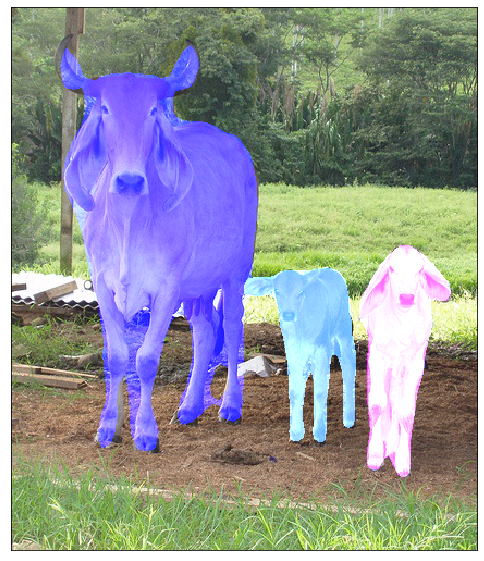

In [22]:
import numpy as np
from helpers import get_masks, instance_segmentation_plot

masks = get_masks(out)
instance_segmentation_plot(image, masks)